In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the csv
df = pd.read_csv("creditcard.csv")
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#Showing the columns in dataset
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are Time and Amount.Feature Time contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature Amount is the transaction Amount,this feature can be used for example-dependant cost-senstive learning.

In [4]:
#As we can see that the data for fraudulent transactions is much less that data for non fraudulent transactions
#So basically our data set is imbalanced,we also need to balance it
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

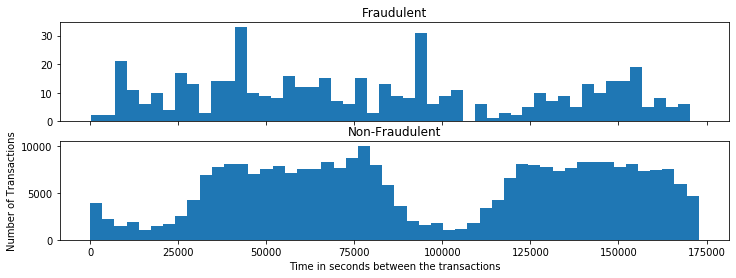

In [5]:
#plotting the data histogram(fraudulent and non fraudulent)
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, figsize = [12,4])

ax1.hist(df.Time[df.Class == 1], bins = 50)
ax1.set_title("Fraudulent")
ax2.hist(df.Time[df.Class == 0], bins = 50)
ax2.set_title("Non-Fraudulent")
plt.xlabel("Time in seconds between the transactions")
plt.ylabel("Number of Transactions")
plt.show()

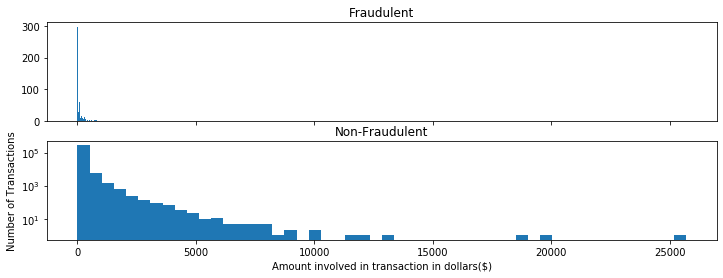

In [6]:
#plotting the data(fraudulent or not) against the amount invoved in transaction
fig, (ax1, ax2) = plt.subplots(2,1, sharex = True, figsize = [12,4])

ax1.hist(df.Amount[df.Class == 1], bins = 50)
ax1.set_title("Fraudulent")
ax2.hist(df.Amount[df.Class == 0], bins = 50)
ax2.set_title("Non-Fraudulent")
plt.xlabel("Amount involved in transaction in dollars($)")
plt.ylabel("Number of Transactions")
plt.yscale("log")
plt.show()
#So as we can see that the fraudulent transaction aren't involved with large money transaction
#And with small money it is all mixed up as we have both fraudulent and not fraudulent with small money

In [7]:
df["Amount"]

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64

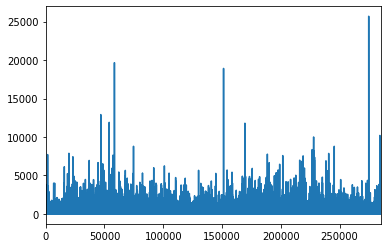

In [8]:
df["Amount"].plot()
#As we can see that the variable amount is very much skewed(very much asymmetrially distributed about its mean)
#So we will standarize it

In [9]:
#Scaling the Amount variable
from sklearn.preprocessing import StandardScaler
s_c = StandardScaler()
df["Amount_Standarized"] = s_c.fit_transform(df["Amount"].values.reshape(-1,1))

In [10]:
#Dropping the Time and Amount(as we have now another column Amount_Standarized corresponding to Amount column) from our dataframe(as Time column is not important in this scenario(but may be possible time have dependance when hit done by a group planned))
df = df.drop(["Time","Amount"],axis = 1)
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'Amount_Standarized'],
      dtype='object')

Now as we know that our data is highly imbalanced so training a model over this data will basically catch the property of showing every transaction to be non fraudulent,as it has been highly trained on non fraudulent data 
as compared to fraudulent data so there is very much need to balance the data.

Now using different data balancing techniques to balance the data.

So as we have seen that we have 492 fraudulent entries in our dataset and 284315 non fraudulent entries in our dataset

Downsampling

In [11]:
#Downsampling the data(md-majority data,mnd-minority data,mds-majority data downsampled)
from sklearn.utils import resample
df_md = df[df.Class == 0]
df_mnd = df[df.Class == 1]
df_mds = resample(df_md,replace = False,n_samples = 492,random_state = 0)
#After downsampling the data points belonging to class non fraudulent concatenating both majority and minority
df_final_downsampled = pd.concat([df_mds,df_mnd])
#Training data
x = df_final_downsampled.drop(columns="Class")
y = df_final_downsampled["Class"]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [13]:
#Model building
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, roc_curve, auc, average_precision_score

In [14]:
#Using this function to create a report of the models in a particular sampling technique
def sampling_res(balancing_technique):
    #here we will be printing the balancing technique we will be going to use
    print(balancing_technique)
    fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,6))
    #model used are fandom forest,xgboost,lightgbm
    model_name = ["RF","XGB","LGB"]
    #Random forest classifier
    RFC = RandomForestClassifier(random_state = 0)
    #xg boost classifier
    XGBC = XGBClassifier(random_state = 0)
    #lightgbm classifier
    LGBC = LGBMClassifier(random_state = 0)

    
    #we will be iterating over all the classifiers(models)we are using and fitting them to the data
    for clf,i in zip([RFC,XGBC,LGBC], model_name):
        model = clf.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_prob = model.predict_proba(X_test)[:,1]
        print(i)
        print("Training Accuracy = {:.2f}".format(model.score(X_train, y_train)))
        print("Test Accuracy = {:.2f}".format(model.score(X_test, y_test)))
        print("ROC_AUC_score : %.6f" % (roc_auc_score(y_test, y_pred)))
        #Confusion Matrix
        print(confusion_matrix(y_test, y_pred))
        print("CLASSIFICATION REPORT")
        print(classification_report(y_test, y_pred))
        
        #plotting the precision-recall curve
        precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)
        avg_pre = average_precision_score(y_test, y_pred_prob)
        ax1.plot(precision, recall, label = i+ " average precision = {:0.2f}".format(avg_pre), lw = 3, alpha = 0.7)
        ax1.set_xlabel('Precision', fontsize = 14)
        ax1.set_ylabel('Recall', fontsize = 14)
        ax1.set_title('Precision-Recall Curve', fontsize = 18)
        ax1.legend(loc = 'best')
        #find default threshold
        close_default = np.argmin(np.abs(thresholds_pr - 0.5))
        ax1.plot(precision[close_default], recall[close_default], 'o', markersize = 8)

        #plotting the roc curve
        #fpr is false positive rate and tpr is true positive rate
        fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr,tpr)
        ax2.plot(fpr,tpr, label = i+ " area = {:0.2f}".format(roc_auc), lw = 3, alpha = 0.7)
        ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
        ax2.set_xlabel("False Positive Rate", fontsize = 14)
        ax2.set_ylabel("True Positive Rate", fontsize = 14)
        ax2.set_title("ROC Curve", fontsize = 18)
        ax2.legend(loc = 'best')
        #find default threshold
        close_default = np.argmin(np.abs(thresholds_roc - 0.5))
        ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
        plt.tight_layout()

Down Sampling
RF
Training Accuracy = 1.00
Test Accuracy = 0.92
ROC_AUC_score : 0.915833
[[141   6]
 [ 19 130]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       147
           1       0.96      0.87      0.91       149

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296

XGB
Training Accuracy = 1.00
Test Accuracy = 0.94
ROC_AUC_score : 0.942725
[[142   5]
 [ 12 137]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       147
           1       0.96      0.92      0.94       149

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296

LGB
Training Accuracy = 1.00
Test Accuracy = 0.93
ROC_AUC_score : 0.925946
[[142   5]
 [ 17 1

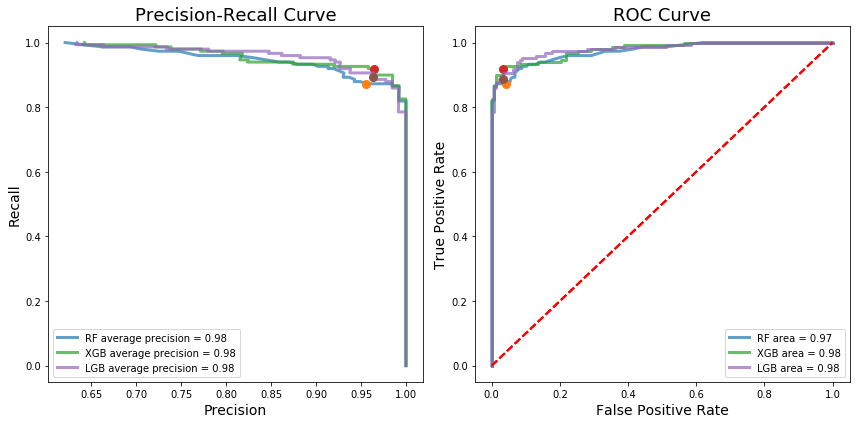

In [15]:
sampling_res("Down Sampling")

Upsampling

In [16]:
#Now upsampling the minority data first splitting the minority class data into train and test set and then upsampling the train data and test it with test data
x = df.drop(columns = 'Class')
y = df['Class']
#First splitting the data into train and test
X_train1, X_test1, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
#Now resampling the train data
df_final = pd.concat([X_train1, y_train1], axis = 1)
train_majority = df_final[df_final.Class == 0]
train_minority = df_final[df_final.Class == 1]
train_minority_upsampled = resample(train_minority, replace = True, n_samples = 199019, random_state = 0)
train_upsampled = pd.concat([train_minority_upsampled, train_majority])
X_train = train_upsampled.drop(columns = 'Class')
y_train = train_upsampled['Class']

Up sampling
RF
Training Accuracy = 1.00
Test Accuracy = 0.95
ROC_AUC_score : 0.946309
[[147   0]
 [ 16 133]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       147
           1       1.00      0.89      0.94       149

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296

XGB
Training Accuracy = 1.00
Test Accuracy = 0.96
ROC_AUC_score : 0.963087
[[147   0]
 [ 11 138]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       147
           1       1.00      0.93      0.96       149

    accuracy                           0.96       296
   macro avg       0.97      0.96      0.96       296
weighted avg       0.97      0.96      0.96       296

LGB
Training Accuracy = 1.00
Test Accuracy = 0.96
ROC_AUC_score : 0.963087
[[147   0]
 [ 11 138

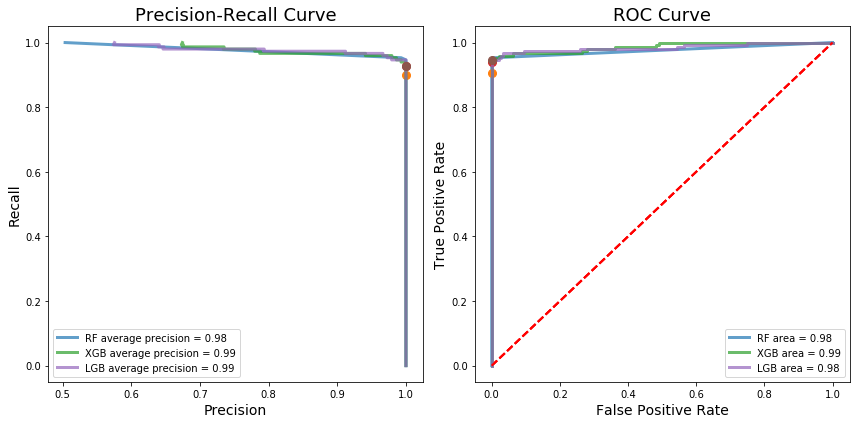

In [17]:
sampling_res("Up sampling")

Using SMOTE (smote regular and borderline smote)

In [32]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'Amount_Standarized'],
      dtype='object')

In [35]:
from imblearn.over_sampling import SMOTE,BorderlineSMOTE
sm = SMOTE(random_state = 0)
X = df.drop(columns = "Class")
y = df["Class"]
X_train_sm, X_test, y_train_sm, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
X_train, y_train = sm.fit_sample(X_train_sm, y_train_sm)

SMOTE Regular
RF
Training Accuracy = 1.00
Test Accuracy = 1.00
ROC_AUC_score : 0.901284
[[85283    13]
 [   29   118]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.90      0.80      0.85       147

    accuracy                           1.00     85443
   macro avg       0.95      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443

XGB
Training Accuracy = 1.00
Test Accuracy = 1.00
ROC_AUC_score : 0.911324
[[85255    41]
 [   26   121]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.75      0.82      0.78       147

    accuracy                           1.00     85443
   macro avg       0.87      0.91      0.89     85443
weighted avg       1.00      1.00      1.00     85443

LGB
Training Accuracy = 1.00
Test Accuracy = 1.00
ROC_AUC_score : 0.914485
[[

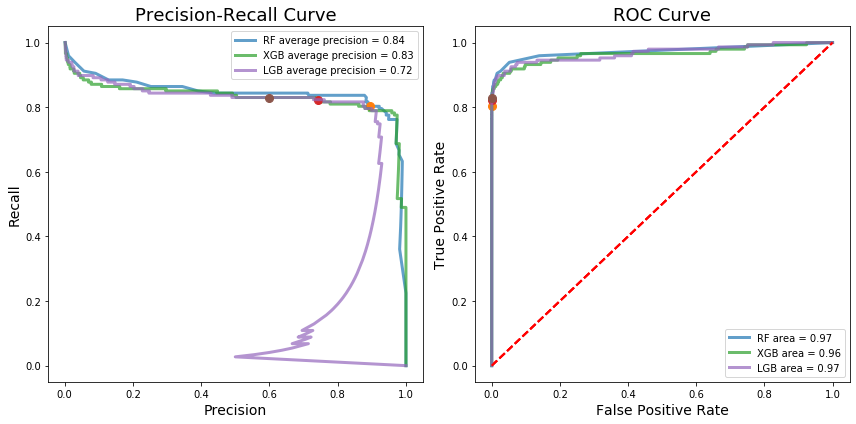

In [36]:
sampling_res("SMOTE Regular")

In [37]:
#for Borderline SMOTE 
sm_b = BorderlineSMOTE(random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)
X_train, y_train = sm_b.fit_sample(X_train, y_train)

Borderline SMOTE
RF
Training Accuracy = 1.00
Test Accuracy = 1.00
ROC_AUC_score : 0.891110
[[85288     8]
 [   32   115]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.93      0.78      0.85       147

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443

XGB
Training Accuracy = 1.00
Test Accuracy = 1.00
ROC_AUC_score : 0.904656
[[85278    18]
 [   28   119]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.87      0.81      0.84       147

    accuracy                           1.00     85443
   macro avg       0.93      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443

LGB
Training Accuracy = 1.00
Test Accuracy = 1.00
ROC_AUC_score : 0.904369

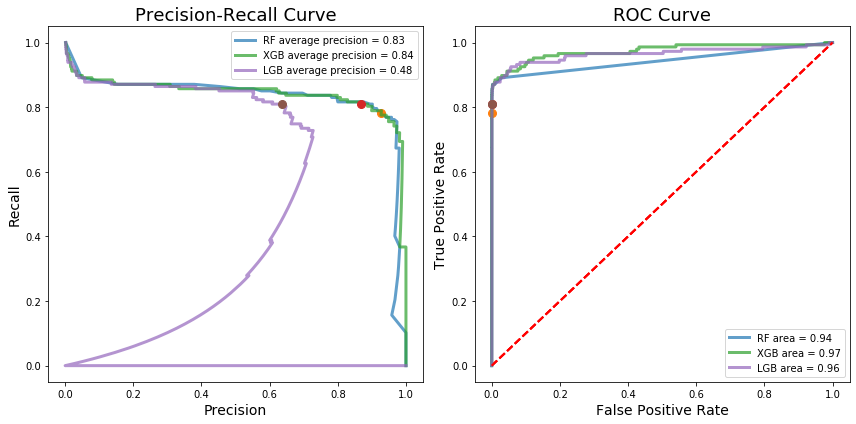

In [38]:
sampling_res("Borderline SMOTE")

In [39]:
#we can also use adasyn and svmsmote but as the predictions so they are okk